In [204]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import matplotlib.ticker as ticker

Automatically created module for IPython interactive environment


In [205]:
df_train=pd.read_csv("D:/CSE519/Project/fixed_train_v1.csv")
df_test=pd.read_csv("D:/CSE519/Project/fixed_test_v1.csv")
df_train.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,rank,weeks_on_chart,...,popularity,diff_year,adjusted_diff_year,log_rank,log_reverse_rank,log_weeks_on_chart,log_jump_time,log_max_duration,continue_week,reverse_rank
0,http://www.billboard.com/charts/hot-100/1988-0...,1988-07-09,42,Monkey,George Michael,MonkeyGeorge Michael,1,NaN,1,16,...,40,30,29.50,0.000000,4.605170,2.772589,0.0,0.0,16,100
1,http://www.billboard.com/charts/hot-100/1968-0...,1968-08-17,83,Hush,Deep Purple,HushDeep Purple,1,NaN,4,10,...,49,50,49.50,1.386294,4.574711,2.302585,0.0,0.0,10,97
2,http://www.billboard.com/charts/hot-100/2000-0...,2000-08-26,99,Aaron's Party (Come Get It),Aaron Carter,Aaron's Party (Come Get It)Aaron Carter,1,NaN,35,15,...,40,18,17.50,3.555348,4.189655,2.708050,0.0,0.0,15,66
3,http://www.billboard.com/charts/hot-100/1967-0...,1967-06-17,92,Soul Dance Number Three,Wilson Pickett,Soul Dance Number ThreeWilson Pickett,1,NaN,55,5,...,31,51,50.75,4.007333,3.828641,1.609438,0.0,0.0,5,46
4,http://www.billboard.com/charts/hot-100/1983-1...,1983-10-15,80,Time Will Reveal,Debarge,Time Will RevealDebarge,1,NaN,18,21,...,31,35,34.25,2.890372,4.418841,3.044522,0.0,0.0,21,83


In [206]:
print(list(df_train))

['url', 'weekid', 'week_position', 'song', 'performer', 'songid', 'instance', 'previous_week_position', 'rank', 'weeks_on_chart', 'year', 'week', 'jump_time', 'max_jump_duration', 'strict_rule', 'lenient_rule', 'all_time_greatest_artist', 'artist_died', 'christmas', 'church', 'classical', 'in_commercials', 'concerts', 'easter', 'fourth_of_july', 'funerals', 'graduations', 'grammys', 'halloween', 'in_movie_clueless', 'in_movies', 'in_plays', 'in_tv_shows', 'karaoke', 'lullabies', 'mtv_awards', 'phone_call', 'politicians', 'sporting_events', 'tv_show_theme', 'weddings', 'won_oscars', 'wordcup', 'popularity', 'diff_year', 'adjusted_diff_year', 'log_rank', 'log_reverse_rank', 'log_weeks_on_chart', 'log_jump_time', 'log_max_duration', 'continue_week', 'reverse_rank']


In [207]:
df_test.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,rank,weeks_on_chart,...,popularity,diff_year,adjusted_diff_year,log_rank,log_reverse_rank,log_weeks_on_chart,log_jump_time,log_max_duration,continue_week,reverse_rank
0,http://www.billboard.com/charts/hot-100/1981-1...,1981-10-03,85,Leila,ZZ Top,LeilaZZ Top,1,NaN,77,4,...,23,37,36.25,4.343805,3.178054,1.386294,0.0,0.0,4,24
1,http://www.billboard.com/charts/hot-100/1961-0...,1961-09-09,97,It's Your World,Marty Robbins,It's Your WorldMarty Robbins,1,NaN,51,9,...,21,57,56.50,3.931826,3.912023,2.197225,0.0,0.0,9,50
2,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-03,42,"I'm Henry VIII, I Am",Herman's Hermits,"I'm Henry VIII, I AmHerman's Hermits",1,NaN,1,10,...,11,53,52.50,0.000000,4.605170,2.302585,0.0,0.0,10,100
3,http://www.billboard.com/charts/hot-100/1969-0...,1969-03-15,94,Time Was,Canned Heat,Time WasCanned Heat,1,NaN,67,5,...,42,49,49.00,4.204693,3.526361,1.609438,0.0,0.0,5,34
4,http://www.billboard.com/charts/hot-100/1996-0...,1996-09-28,47,Bow Down,Westside Connection,Bow DownWestside Connection,1,NaN,21,20,...,54,22,21.50,3.044522,4.382027,2.995732,0.0,0.0,20,80


In [208]:
rank_train=df_train.groupby('rank')
rank=[]
mean_continue=[]
mean_onchart=[]
filter_group=[]
data_to_plot_week_on_chart=[]
data_to_plot_continue_week=[]
for idx, group in rank_train:
    rank.append(idx)
    data_to_plot_week_on_chart.append(group['weeks_on_chart'].tolist())
    data_to_plot_continue_week.append(group['continue_week'].tolist())
    meancontinue=np.mean(group['continue_week'].tolist())
    mean_continue.append(meancontinue)
    meanonchart=np.mean(group['weeks_on_chart'].tolist())
    mean_onchart.append(meanonchart)
    continue_variance=np.std(group['continue_week'].tolist())
    low_bar=meancontinue-3*continue_variance
    high_bar=meancontinue+3*continue_variance
    new_group=group.loc[(group['continue_week']>=low_bar) & (group['continue_week']<=high_bar)]
    filter_group.append(new_group)
    print("original group shape is "+ str(group.shape[0]) + "   the filtered group shape is "+  str(new_group.shape[0]))
    #

original group shape is 800   the filtered group shape is 784
original group shape is 356   the filtered group shape is 347
original group shape is 361   the filtered group shape is 354
original group shape is 302   the filtered group shape is 296
original group shape is 299   the filtered group shape is 295
original group shape is 278   the filtered group shape is 275
original group shape is 292   the filtered group shape is 290
original group shape is 263   the filtered group shape is 255
original group shape is 254   the filtered group shape is 252
original group shape is 274   the filtered group shape is 272
original group shape is 223   the filtered group shape is 220
original group shape is 241   the filtered group shape is 238
original group shape is 194   the filtered group shape is 193
original group shape is 205   the filtered group shape is 203
original group shape is 185   the filtered group shape is 182
original group shape is 173   the filtered group shape is 171
original

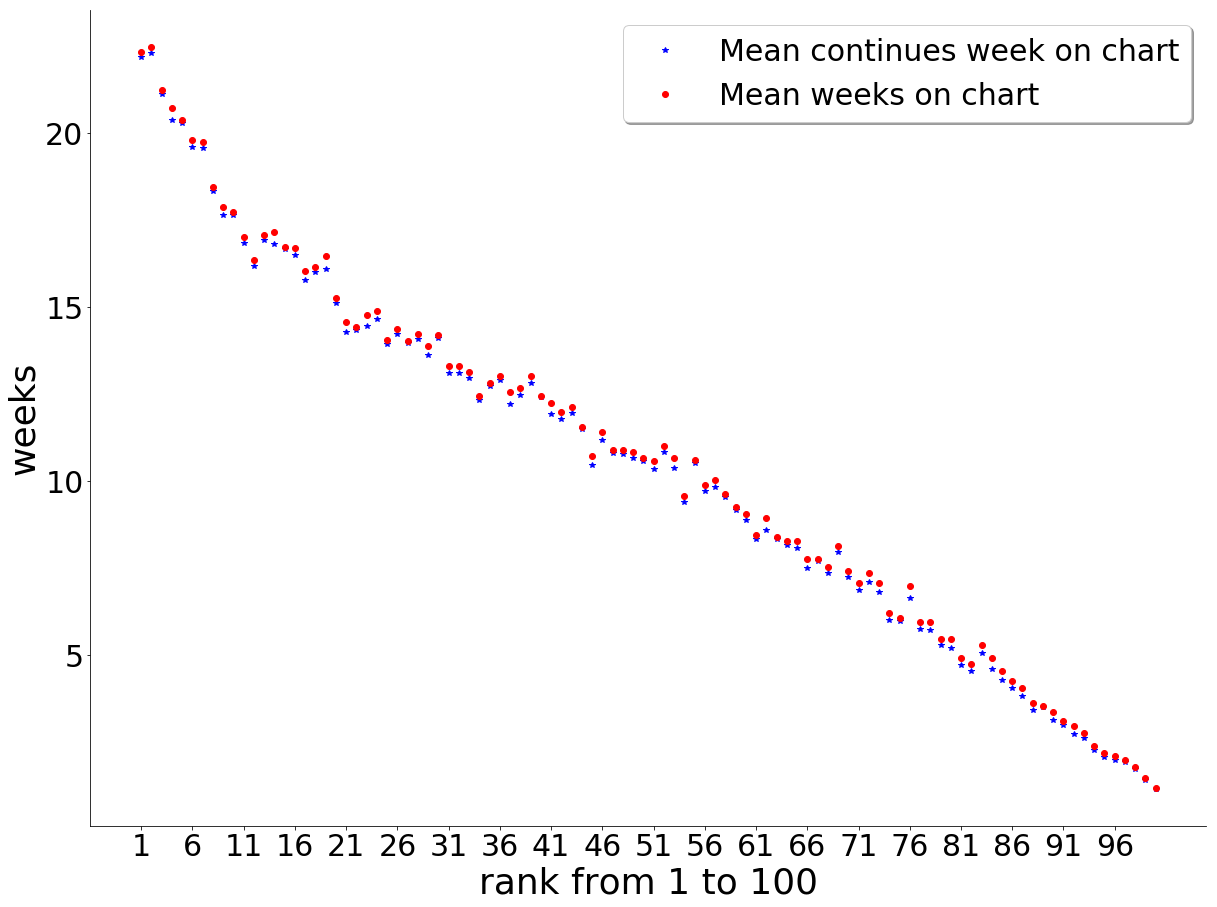

In [209]:
plt.figure(figsize=(20,15))
ax=plt.gca()
ax.plot(rank, mean_continue, '*', color='blue',label='Mean continues week on chart')
ax.plot(rank, mean_onchart, 'o', color='red',label='Mean weeks on chart')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
plt.xticks(np.arange(min(rank), max(rank)+1, 5.0),fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('rank from 1 to 100',fontsize=36)
plt.ylabel("weeks",fontsize=36)
plt.legend(loc='upper right', shadow=True, fontsize=30)
plt.savefig('rank_week_on_chart.png', bbox_inches='tight', pad_inches=0.0)

In [220]:
def plot_multiple_box_plot(data_to_plot):
    plt.figure(figsize=(20,15))
    ax=plt.gca()
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )
    
    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)


    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([val for val in range(1, 110, 5)])
    ax.set_xticklabels([str(val) for val in range(1, 100, 5)],fontsize=30)
    plt.yticks(fontsize=30)
    plt.rcParams['ytick.labelsize']=36
#     ax.set_yticklabels(fontsize=18)
    plt.xlabel('rank',fontsize=36)
    plt.ylabel('weeks',fontsize=36)
    fig.savefig('NEW_new.png',pad_inches=0.5, bbox_inches='tight')

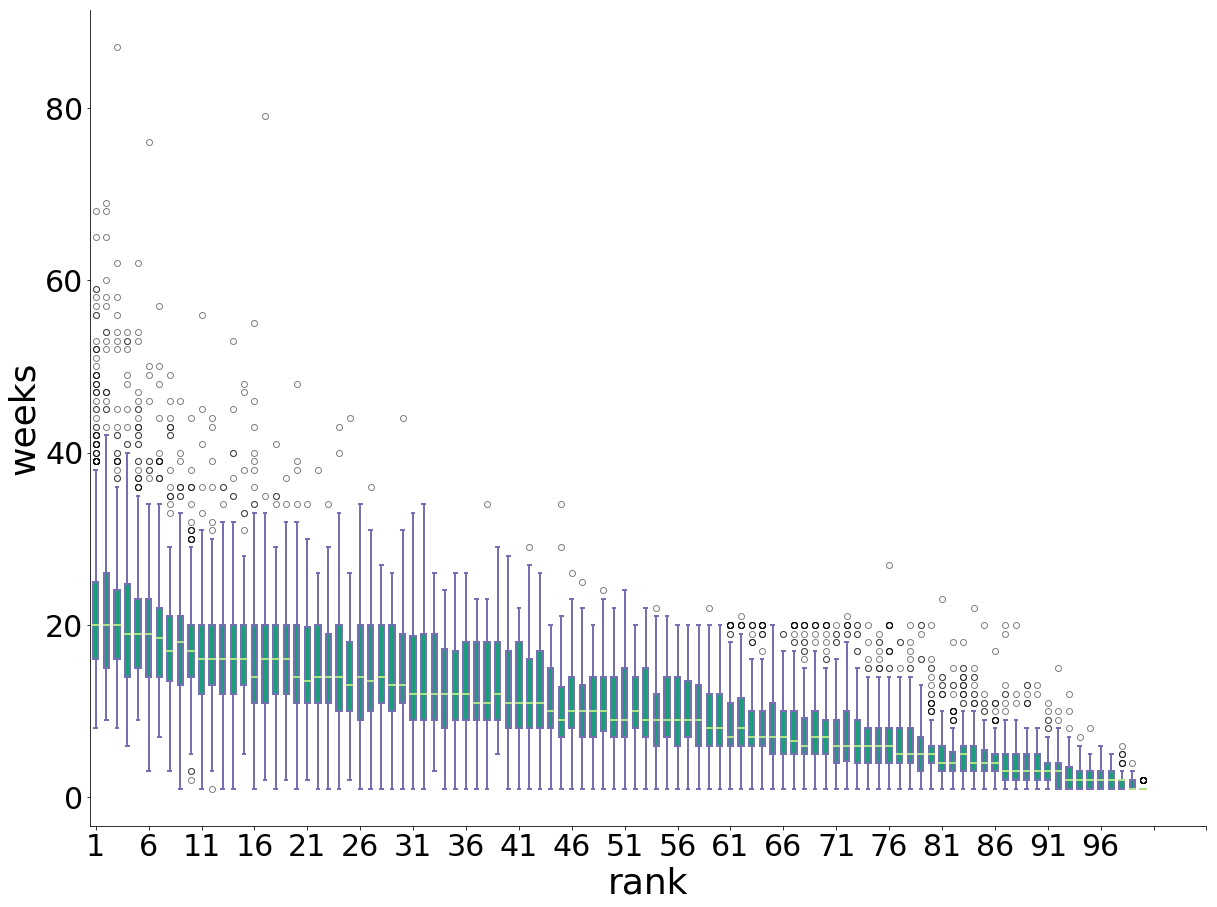

In [221]:
plot_multiple_box_plot(data_to_plot_week_on_chart)

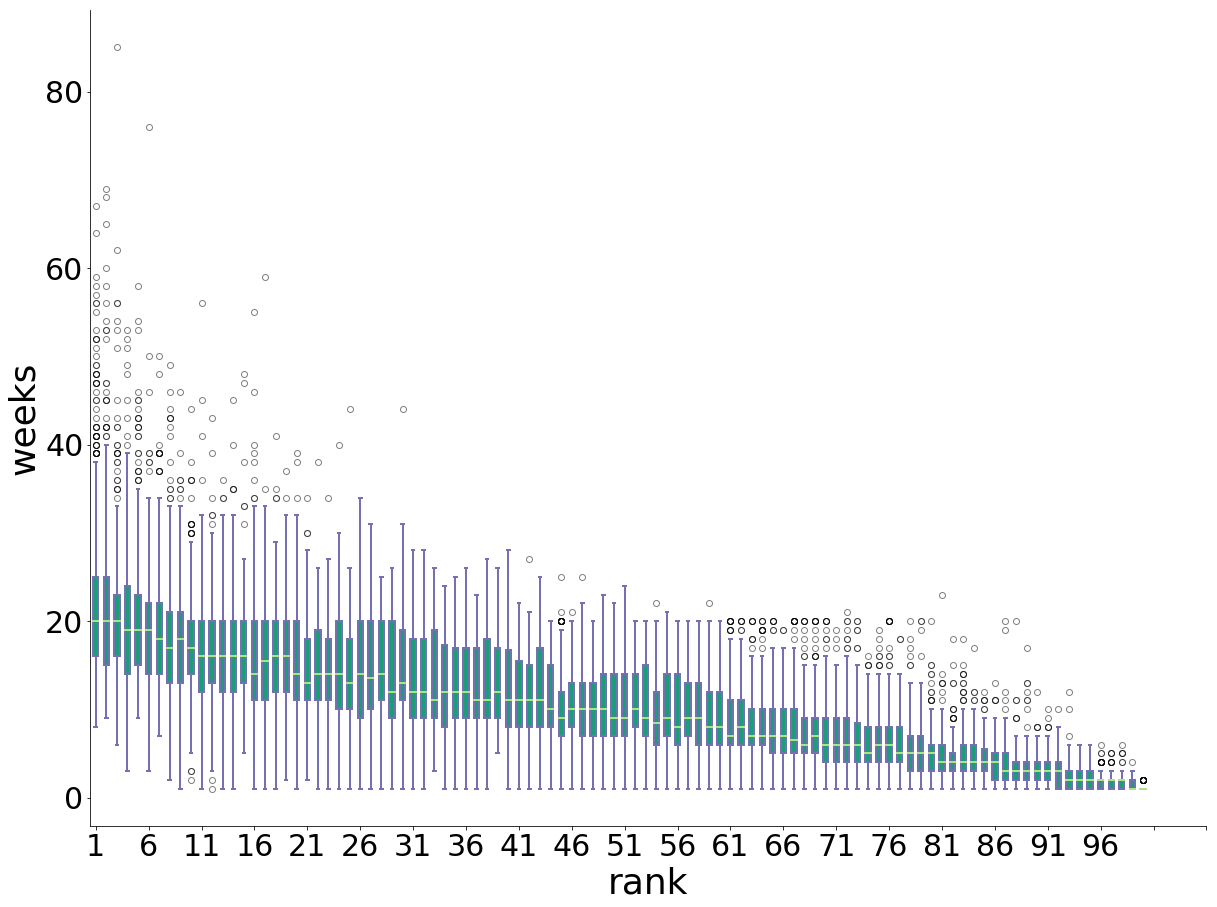

In [203]:
plot_multiple_box_plot(data_to_plot_continue_week)